# Tutorial: Show the layout of the focal plane

This notebook show how to illustrate the layout of the detectors on the focal plane.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pickle as pkl
import warpfield as w

In [2]:
from astropy.coordinates import SkyCoord, Longitude, Latitude, Angle
from astropy.time import Time
import astropy.units as u

Point the telescope toward the Galactic center. The position angle of the telescope is set 0.0 deg in the galactic coordinate.

In [4]:
pointing = SkyCoord.from_name('Galactic Center').galactic
position_angle = Angle(0.0, unit='degree')
src = w.retrieve_gaia_sources(pointing, 0.25*u.deg)

INFO: Query finished. [astroquery.utils.tap.core]


The following sample defines the telescope with a single detector with the dimension of 4096&times;4096. The physical pixel size is set 10 &mu;m.

In [5]:
jasmine_HgCdTe = w.Telescope(pointing, position_angle)

Use `display_focal_plane` function to display the detector layout.

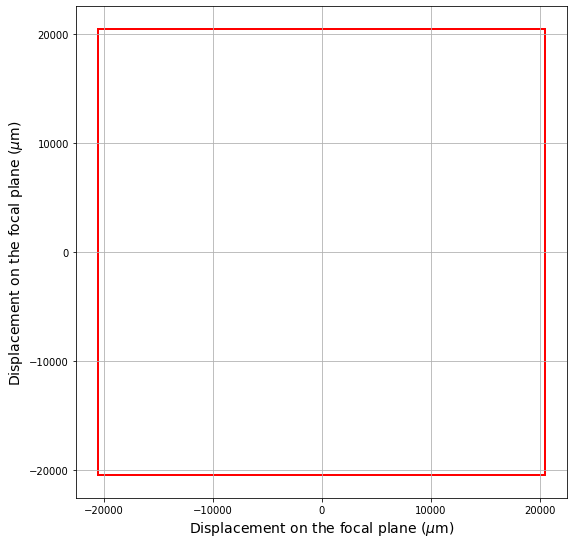

In [6]:
jasmine_HgCdTe.display_focal_plane()

When the source list is provided, the detectors are overlaid on the sources.

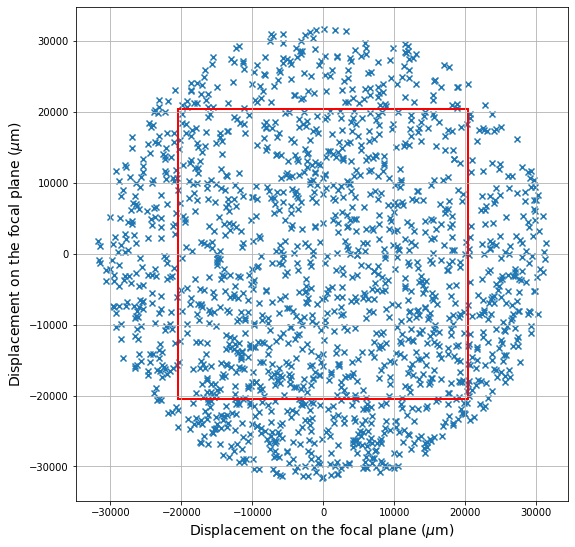

In [7]:
jasmine_HgCdTe.display_focal_plane(src)

Here, we define another detector layout. A new telescope has 9 detectors. Each detector has the dimension of 1024&times;1024 with the pixel scale of 15 &mu;m. The detectors are tiled over the focal plane, where the centers of the adjacent detectors are separated by 18 mm. Create a list of the detectors. The `Telescope` constructor receives the list as `detectors`.

In [8]:
arr = np.arange(-1,2)*18000
xx,yy = np.meshgrid(arr,arr)
naxis1,naxis2 = 1024,1024
pxscale = 15.0
det = [w.Detector(naxis1,naxis2,pxscale,offset_dx=x,offset_dy=y) for x,y in zip(xx.flat,yy.flat)]
jasmine_InGaAs = w.Telescope(pointing,position_angle,detectors=det)

The layout is shown by the `display_focal_plane` function.

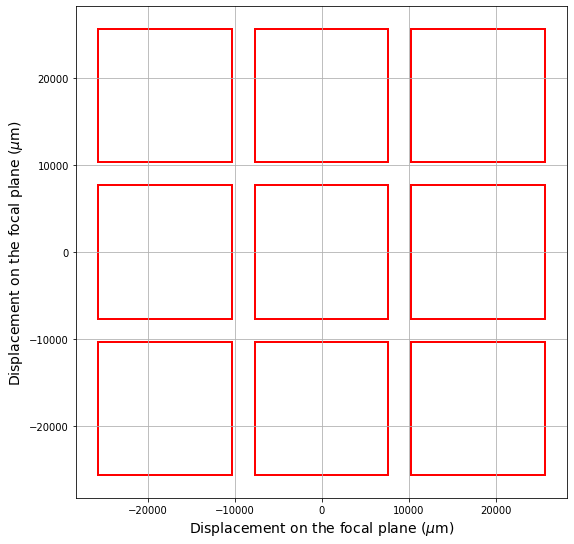

In [9]:
jasmine_InGaAs.display_focal_plane()

The positions of the sources are displayed as well when the source list is provided.

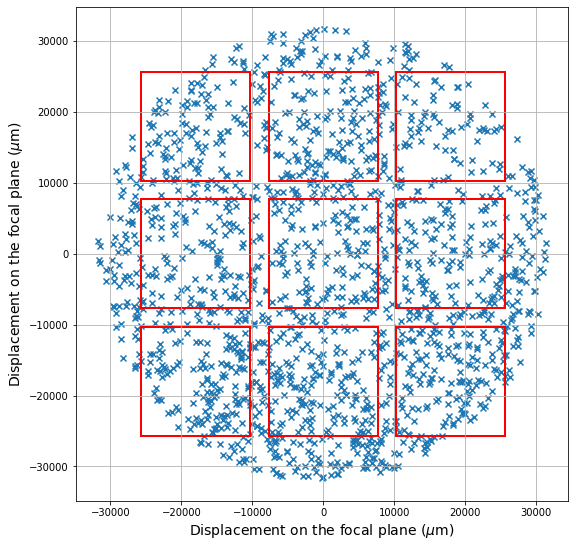

In [10]:
jasmine_InGaAs.display_focal_plane(src)